## **Problem 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def y_closed_form(t, y0, r, K):
    return K / np.sqrt(1 + (-1 + (K / y0) ** 2) * np.exp(-2 * r * t))

def dy_dt(y, r, K):
    return r * (1 - (y / K)**2) * y

def error(y_n, y_e):
    return np.sqrt(np.mean((y_n - y_e) ** 2))

def explicit_euler(y0, dt, t_end, r, K):
    times = np.arange(0, t_end + dt, dt)
    y_values = np.zeros_like(times)
    y_values[0] = y0
    for i in range(1, len(times)):
        y_values[i] = y_values[i-1] + dt * dy_dt(y_values[i-1], r, K)
    return times, y_values

def midpoint(y0, dt, t_end, r, K):
    times = np.arange(0, t_end + dt, dt)
    y_values = np.zeros_like(times)
    y_values[0] = y0
    for i in range(1, len(times)):
        y_half = y_values[i-1] + 0.5 * dt * dy_dt(y_values[i-1], r, K)
        y_values[i] = y_values[i-1] + dt * dy_dt(y_half, r, K)
    return times, y_values

def RK4(y0, dt, t_end, r, K):
    times = np.arange(0, t_end + dt, dt)
    y_values = np.zeros_like(times)
    y_values[0] = y0
    for i in range(1, len(times)):
        k1 = dt * dy_dt(y_values[i-1], r, K)
        k2 = dt * dy_dt(y_values[i-1] + 0.5 * k1, r, K)
        k3 = dt * dy_dt(y_values[i-1] + 0.5 * k2, r, K)
        k4 = dt * dy_dt(y_values[i-1] + k3, r, K)
        y_values[i] = y_values[i-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return times, y_values


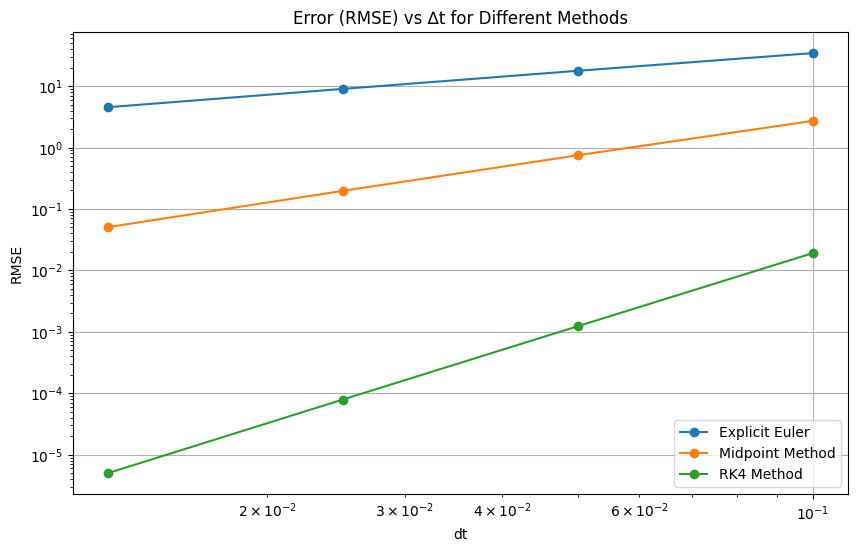

In [10]:
y0 = 6
r = 3
K = 400
t_max = 2

dt_values = [0.1, 0.05, 0.025, 0.0125]

errors_euler = []
errors_mid = []
errors_rk4 = []

for dt in dt_values:
    times, y_euler = explicit_euler(y0, dt, t_max, r, K)
    _, y_mid = midpoint(y0, dt, t_max, r, K)
    _, y_rk4 = RK4(y0, dt, t_max, r, K)
    
    y_exact = y_closed_form(times, y0, r, K)
    
    errors_euler.append(error(y_euler, y_exact))
    errors_mid.append(error(y_mid, y_exact))
    errors_rk4.append(error(y_rk4, y_exact))

plt.figure(figsize=(10, 6))
plt.plot(dt_values, errors_euler, 'o-', label="Explicit Euler")
plt.plot(dt_values, errors_mid, 'o-', label="Midpoint Method")
plt.plot(dt_values, errors_rk4, 'o-', label="RK4 Method")
plt.xlabel("dt")
plt.ylabel("RMSE")
plt.title("Error (RMSE) vs ∆t for Different Methods")
plt.xscale("log")  #scale
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()


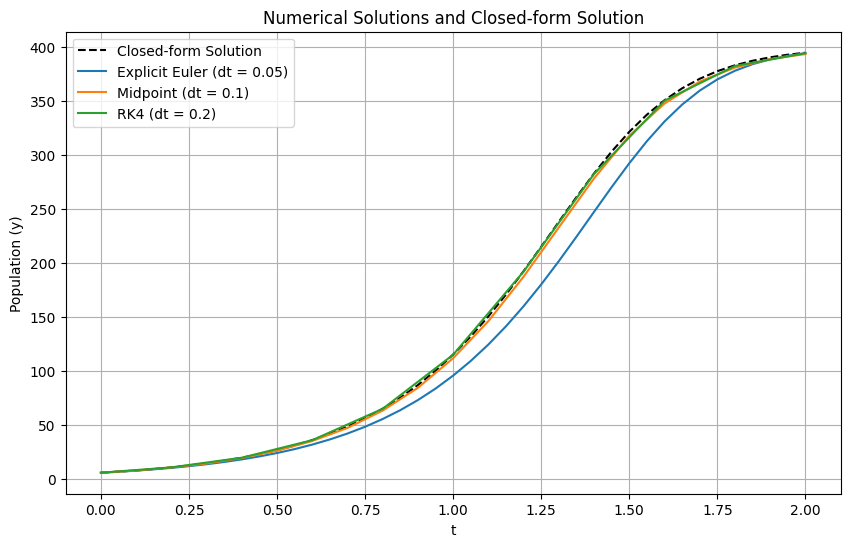

In [11]:
dt_euler = 0.05
dt_mid = dt_euler * 2
dt_rk4 = dt_mid * 2

times_euler, y_euler = explicit_euler(y0, dt_euler, t_max, r, K)
times_mid, y_mid = midpoint(y0, dt_mid, t_max, r, K)
times_rk4, y_rk4 = RK4(y0, dt_rk4, t_max, r, K)

times_exact = np.arange(0, t_max + dt_euler, dt_euler)
y_exact = y_closed_form(times_exact, y0, r, K)

plt.figure(figsize=(10, 6))
plt.plot(times_exact, y_exact, label="Closed-form Solution", color="black", linestyle="--")
plt.plot(times_euler, y_euler, label="Explicit Euler (dt = 0.05)")
plt.plot(times_mid, y_mid, label="Midpoint (dt = 0.1)")
plt.plot(times_rk4, y_rk4, label="RK4 (dt = 0.2)")
plt.xlabel("t")
plt.ylabel("Population (y)")
plt.title("Numerical Solutions and Closed-form Solution")
plt.legend()
plt.grid()
plt.show()

Explicit Euler shows the largest deviation with RK4 and Midpoint being extremely close to the clsoed form solution. 

## **Problem 2**